In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('/kaggle/input/capstone-bank-lending-prediction/lending_train.csv')

In [2]:
import seaborn as sns

In [3]:
from scipy.stats import chi2_contingency
from scipy.stats import chisquare

In [4]:
from scipy.stats import f_oneway

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_cols = df.select_dtypes(include=numerics).columns # get column names containing numeric data
categorical_cols = list(set(df.columns) - set(numeric_cols))

In [6]:
# fill in missing values

#categorical cols with mode
for i in categorical_cols:
    mode = df[i].mode()[0]
    df[i].fillna(mode,inplace = True)
    df[i].replace([np.inf,-np.inf],mode,inplace= True)
#numerical with median
for i in numeric_cols:
    median = df[i].median()
    df[i].fillna(median,inplace=True)
    df[i].replace([np.inf,-np.inf],median,inplace=True)

In [7]:
for col in numeric_cols:
    CategoryGroupLists=df.groupby('race')[col].apply(list)
    # perform the ANOVA test
    AnovaResults = f_oneway(*CategoryGroupLists)
    print(col, ' P-Value for Anova is: ', AnovaResults[1])

ID  P-Value for Anova is:  0.2630202471325162
requested_amnt  P-Value for Anova is:  0.1256348228567462
annual_income  P-Value for Anova is:  0.16895793560701916
debt_to_income_ratio  P-Value for Anova is:  0.7767309270811992
public_bankruptcies  P-Value for Anova is:  0.8205601916463314
delinquency_last_2yrs  P-Value for Anova is:  0.790908284785353
fico_score_range_low  P-Value for Anova is:  0.0
fico_score_range_high  P-Value for Anova is:  0.0
fico_inquired_last_6mths  P-Value for Anova is:  0.7013816970939133
months_since_last_delinq  P-Value for Anova is:  0.8160845799019724
revolving_balance  P-Value for Anova is:  0.1632079978389206
total_revolving_limit  P-Value for Anova is:  0.05705567157440096
any_tax_liens  P-Value for Anova is:  0.1622571203565194
loan_paid  P-Value for Anova is:  0.33887898390201676


fico_score_range_low and fico_score_range_high correlated w race column

In [8]:
# code from chirag's notebook
fico_mean = (df["fico_score_range_low"]+df['fico_score_range_high'])/2
fico_range = (df['fico_score_range_high']-df['fico_score_range_low'])
df.drop(columns=["fico_score_range_high","fico_score_range_low"],inplace=True)
df['fico_mean'] = fico_mean
df["fico_range"] = fico_range

replace fico low/high with mean and range values to keep relevant data without race correlation

In [9]:
#check that there is no correlation w race

CategoryGroupLists=df.groupby('race')['fico_mean'].apply(list)
# perform the ANOVA test
AnovaResults = f_oneway(*CategoryGroupLists)
print('fico_mean p-Value for Anova is: ', AnovaResults[1])

CategoryGroupLists=df.groupby('race')['fico_range'].apply(list)
# perform the ANOVA test
AnovaResults = f_oneway(*CategoryGroupLists)
print('fico_range p-Value for Anova is: ', AnovaResults[1])

fico_mean p-Value for Anova is:  0.0
fico_range p-Value for Anova is:  0.28377169137951663


<AxesSubplot:ylabel='fico_mean'>

/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


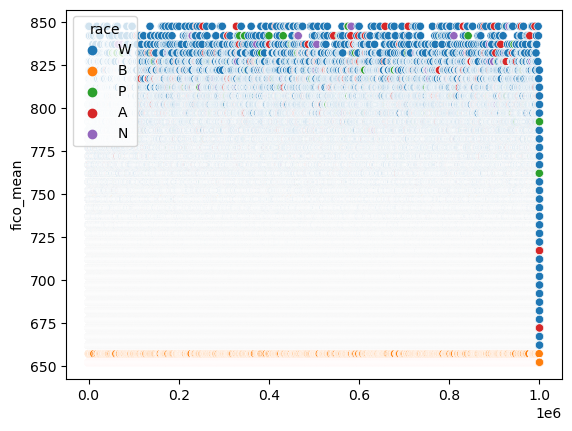

In [10]:
sns.scatterplot(data=df, x=df.index, y='fico_mean', hue='race')

<AxesSubplot:ylabel='fico_range'>

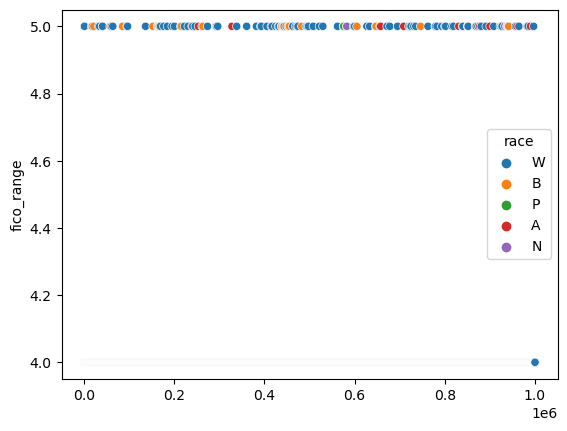

In [11]:
sns.scatterplot(data=df, x=df.index, y='fico_range', hue='race')

In [12]:
# code from chirag's notebook
print(df["requested_amnt"].corr(df["loan_paid"]))
print(df["annual_income"].corr(df["loan_paid"]))
loan_income_ratio = df["requested_amnt"] / df["annual_income"]
print(loan_income_ratio.corr(df["loan_paid"]))
df["loan_income_ratio"] = loan_income_ratio

-0.06587877771437163
0.04133225140212284
nan


In [13]:
for col in categorical_cols:
    crosstab_result = pd.crosstab(index=df['race'], columns=df[col])
    # Performing Chi-sq test
    ChiSqRes = chi2_contingency(crosstab_result)
    print(col, ' p-value: ', ChiSqRes[1]) # p-value

race  p-value:  0.0
state  p-value:  0.010921425125704647
type_of_application  p-value:  0.5988728505564539
extended_reason  p-value:  0.03334756447238668
zipcode  p-value:  0.4697358422569713
home_ownership_status  p-value:  0.16806783081281643
reason_for_loan  p-value:  0.5791426027145052
employment  p-value:  0.290572088557202
employment_length  p-value:  0.3263579815020445
loan_duration  p-value:  0.5432004833448337
employment_verified  p-value:  0.6837111491424117


state and extended_reason are correlated w race column

In [14]:
numeric_cols = df.select_dtypes(include=numerics).columns
df[numeric_cols].corr()

,ID,requested_amnt,annual_income,debt_to_income_ratio,public_bankruptcies,delinquency_last_2yrs,fico_inquired_last_6mths,months_since_last_delinq,revolving_balance,total_revolving_limit,any_tax_liens,loan_paid,fico_mean,fico_range,loan_income_ratio
ID,1.000000,-0.000911,-0.000064,-0.001159,0.002168,0.001178,0.002825,-0.001126,0.000400,0.001067,0.000519,0.000389,-0.000262,0.000806,-0.000473
requested_amnt,-0.000911,1.000000,0.309582,0.031964,-0.094508,-0.003870,-0.014550,-0.017345,0.315641,0.302153,0.007520,-0.065879,0.083669,0.004018,0.005322
annual_income,-0.000064,0.309582,1.000000,-0.139109,-0.043582,0.040529,0.032988,-0.025618,0.283317,0.263871,0.038964,0.041332,0.059814,0.005429,-0.003200
debt_to_income_ratio,-0.001159,0.031964,-0.139109,1.000000,-0.018487,-0.007721,-0.006612,0.003284,0.109720,0.057204,-0.023493,-0.084206,-0.053613,-0.009321,0.004024
public_bankruptcies,0.002168,-0.094508,-0.043582,-0.018487,1.000000,-0.047471,0.073650,0.077194,-0.116258,-0.111364,0.035308,-0.025274,-0.169343,-0.004196,-0.000980
delinquency_last_2yrs,0.001178,-0.003870,0.040529,-0.007721,-0.047471,1.000000,0.024242,-0.471357,-0.027729,-0.039585,0.011834,-0.019654,-0.145712,-0.004266,0.000513
fico_inquired_last_6mths,0.002825,-0.014550,0.032988,-0.006612,0.073650,0.024242,1.000000,0.015379,-0.010593,0.014156,0.010190,-0.064353,-0.071982,-0.006334,-0.000459
months_since_last_delinq,-0.001126,-0.017345,-0.025618,0.003284,0.077194,-0.471357,0.015379,1.000000,-0.019698,-0.020943,0.008570,0.006485,0.010706,-0.001222,-0.001476
revolving_balance,0.000400,0.315641,0.283317,0.109720,-0.116258,-0.027729,-0.010593,-0.019698,1.000000,0.799827,-0.012666,0.019651,0.020235,-0.002788,0.000554
total_revolving_limit,0.001067,0.302153,0.263871,0.057204,-0.111364,-0.039585,0.014156,-0.020943,0.799827,1.000000,-0.016076,0.048736,0.215498,0.016258,0.000498


revolving_balance and total_revolving_limit very highly correlated, total_revolving limit more correlated with loan_paid, so we keep this one

same logic with months_since_last_delinq and delinquency_last_2yrs, keep the latter

In [15]:
cat_df = df[categorical_cols]  # temp df of only categorical data

cat_df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)


,race,state,type_of_application,extended_reason,zipcode,home_ownership_status,reason_for_loan,employment,employment_length,loan_duration,employment_verified
race,1.000000,0.000624,0.000424,-0.000318,-0.000115,0.000052,-0.000787,-0.000027,0.000989,-0.000076,-0.000514
state,0.000624,1.000000,0.014198,-0.007033,0.241131,0.052800,-0.012488,-0.000690,-0.005477,-0.009861,0.000675
type_of_application,0.000424,0.014198,1.000000,-0.031041,0.016067,0.032773,-0.010344,-0.025746,0.002205,-0.042277,-0.010139
extended_reason,-0.000318,-0.007033,-0.031041,1.000000,-0.008442,-0.019270,0.062599,0.195487,0.020047,0.012546,-0.009509
zipcode,-0.000115,0.241131,0.016067,-0.008442,1.000000,0.098551,-0.009565,-0.007294,-0.026005,-0.012542,0.002743
home_ownership_status,0.000052,0.052800,0.032773,-0.019270,0.098551,1.000000,-0.026819,-0.024415,-0.091135,-0.057055,-0.000796
reason_for_loan,-0.000787,-0.012488,-0.010344,0.062599,-0.009565,-0.026819,1.000000,0.005093,0.019922,0.071129,0.025973
employment,-0.000027,-0.000690,-0.025746,0.195487,-0.007294,-0.024415,0.005093,1.000000,0.044812,-0.008996,0.012163
employment_length,0.000989,-0.005477,0.002205,0.020047,-0.026005,-0.091135,0.019922,0.044812,1.000000,0.016082,0.039614
loan_duration,-0.000076,-0.009861,-0.042277,0.012546,-0.012542,-0.057055,0.071129,-0.008996,0.016082,1.000000,0.128295


In [16]:
excluded = ['ID', 'months_since_last_delinq', 'revolving_balance', 'race', 'state', 'extended_reason']
included = list(set(df.columns) - set(excluded))

df = df[included]

print(df.head(5))

   fico_range  delinquency_last_2yrs  loan_income_ratio  public_bankruptcies  \
0         4.0                    0.0           0.128000                  0.0   
1         4.0                    0.0           0.085714                  0.0   
2         4.0                    1.0           0.113514                  0.0   
3         4.0                    0.0           0.216111                  0.0   
4         4.0                    0.0           0.279070                  0.0   

  zipcode  total_revolving_limit employment_verified  any_tax_liens  \
0   333xx               105700.0            Verified            0.0   
1   727xx                14600.0     Source Verified            0.0   
2   146xx                10300.0        Not Verified            0.0   
3   497xx                25200.0     Source Verified            0.0   
4   550xx               104200.0        Not Verified            0.0   

  home_ownership_status  annual_income  requested_amnt  \
0                  RENT       2500